# 수치 미분
- $\dfrac{df(x)}{dx} = \lim_{h->0} \dfrac{f(x+h) - f(x)}{x+h-x}$
- $\dfrac{df(x)}{dx} = \lim_{h->0} \dfrac{f(x+h) - f(x-h)}{2h}$
- h값을 정하는 게 중요함
- 너무 작으면 반올림의 오차가 발생
- h=1e-4가 적당

In [43]:
# version1
def numerical_gradient(f, x):
    h = 1e-4
    temp_x = np.reshape(x, -1)
    
    grad = np.zeros_like(temp_x)
    tmp_val = temp_x
       
    for idx in range(x.size):
        tmp_val = temp_x[idx]
        
        # f+h
        temp_x[idx] = tmp_val + h
        fxh1 = f(temp_x[idx])
        
        # f-h
        temp_x[idx] = tmp_val - h
        fxh2 = f(temp_x[idx])
        # gradient
        grad[idx] = (fxh1 - fxh2) / (h)
        
        # recover value
        temp_x[idx] = tmp_val
    
    return grad.reshape(x.shape)

numerical_gradient(lambda x: x**2, a)

array([[2.46993394, 3.79978351, 3.61606312],
       [1.53009958, 2.48166673, 2.52556609]])

In [22]:
# version2
def numerical_gradient(f, x):
    h = 1e-4
    temp_x = np.reshape(x, -1)
    
    grad = np.zeros_like(temp_x)
    tmp_val = temp_x
    
    fxh1 = f(tmp_val + h)
    fxh2 = f(tmp_val - h)
    
    grad = (fxh1 - fxh2) / (h)
    return grad.reshape(x.shape)

a = np.random.randn(784, 50)
b = numerical_gradient(lambda x: x**2, a)
b.shape

(784, 50)

In [20]:
numerical_gradient(lambda x: 3**2 + x**2, np.random.randn(4,3))

(4, 3)


array([[ 2.20679466,  2.28937732,  2.78548393],
       [-5.03455695,  4.88801499, -2.85231912],
       [-5.9135703 ,  2.78994348, -1.25844391],
       [-1.99342859,  1.8048315 ,  8.0300598 ]])

In [25]:
# init_x를 -에 가깝게 만들자
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    
    # x0, x1, x2, x3, ...x -= lr * grad기울기 한번에 구함
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.random.randn(784, 50)
ans = gradient_descent(lambda x: x**2, init_x)
ans.shape

(784, 50)

In [29]:
print(ans[0].shape)
ans[0][0] # 0에 가까움

(50,)


0.006235959417023321

# 손실함수
- 평균제곱오차

In [36]:
y1 = np.array([.85, .05, .1]) # wrong
y2 = np.array([.1 , .05, .85])
t = np.array([0, 0, 1])

def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

mean_squared_error(y1, t), mean_squared_error(y2, t) 

(0.7675, 0.017500000000000005)

- cross entropy

In [37]:
y1 = np.array([.1, .2, .7, 0]) # wrong
y2 = np.array([.7, .2, .1, 0])
t = np.array([0, 0, 1, 0])

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y+delta))

cross_entropy_error(y1, t), cross_entropy_error(y2, t)

(0.3566748010815999, 2.302584092994546)

In [38]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size) # eg. (4, ) -> (1, 4)
        y = y.reshape(1, y.size)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y + 1e-7)) / batch_size
    # label이 1~7일 때
    #return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [39]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [40]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

# 활성화 함수
- 신호를 변환
- 반드시 비선형함수

In [41]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

# no array
def step_function(x):
    if x > 0:
        return 1
    return 0

# array
def step_function(x):
    y = x > 0
    return y.astype(np.int)

def relu(x):
    return np.maximum(0, x)

In [42]:
x = np.array([-1, 1, 2])
x > 0

array([False,  True,  True])

In [43]:
step_function(x)

array([0, 1, 1])

In [44]:
x = np.arange(-5, 5, .1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-.1, 1.1)
plt.show()

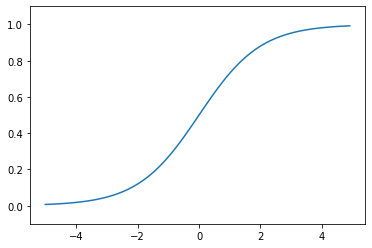

In [107]:
x = np.arange(-5, 5, .1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-.1, 1.1)
plt.show()

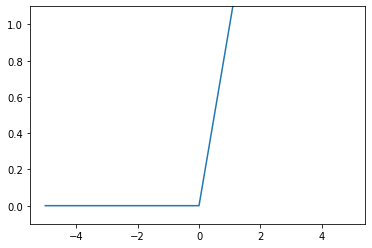

In [111]:
x = np.arange(-5, 5, .1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-.1, 1.1)
plt.show()

# 미니배치
- 데이터 중 일부만 훈련시킴

In [10]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from book_code.dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) =\
load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [12]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

# SGD
- 벡터의 gradient를 구한다
- 벡터를 업데이트 한다
- 반복한다

In [43]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    # x0, x1, x2, x3, ...x -= lr * grad기울기 한번에 구함
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-0.3, 4.0])
numerical_gradient(function_2, init_x)
gradient_descent(function_2, init_x)

array([-0.03978587,  0.53047822])

# Simpel update

In [50]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2, 3)
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        
        return loss

In [52]:
net = simpleNet()
print(net.W)

[[ 0.80563957 -0.5827213   1.24742612]
 [ 1.31182398  1.73793252 -0.36467726]]


In [55]:
# 2 feature 데이터 넣어서 3class 판별
x = np.array([0.6, 0.9])
p = net.predict(x)
t = np.array([0, 0, 1])
print('loss is: ', net.loss(x, t))

loss is:  1.899342031673723


In [65]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.31149844  0.19870384 -0.51020228]
 [ 0.46724765  0.29805576 -0.76530342]]


# Get together

In [154]:
x_batch = x_train[batch_mask]
x_batch.shape

(100, 784)

In [45]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
            
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        print('W1 {}; W2 {}; b1 {}; b2 {}'.format(self.params['W1'].shape, self.params['W2'].shape, self.params['b1'].shape, self.params['b2'].shape))
        
    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        return y
    
    def loss(self, x, t):
        y = self.predict(x) # y.shape: (batch_size, 784)
        return cross_entropy_error(y, t) # float
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y==t)/float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t) # float
        
        grad = {}
        print(self.params['W1'].shape)
        grads['W1'] = numerical_gradient(loss_W, self.params['W1']) # param (f, x)
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads

In [46]:
from book_code.dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

# 하이퍼파라미터
iters_num = 10000  # 반복 횟수를 적절히 설정한다.
train_size = x_train.shape[0]
batch_size = 100   # 미니배치 크기
learning_rate = 0.1

for i in range(iters_num):
    # 미니배치 획득
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 기울기 계산
    grad = network.numerical_gradient(x_batch, t_batch)
    #grad = network.gradient(x_batch, t_batch)

W1 (784, 50); W2 (50, 10); b1 (50,); b2 (10,)
(784, 50)


ValueError: cannot reshape array of size 1 into shape (784,50)

# cf.

In [68]:
it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
it.finished

False

In [14]:
a = np.random.rand(2,3)
it = np.nditer(a, flags=['multi_index'], op_flags=['readwrite'])
for i in it:
    print(it.multi_index)

(0, 0)
(0, 1)
(0, 2)
(1, 0)
(1, 1)
(1, 2)
